## SVD
PCA와 유사한 행렬 분해 기법 사용. 정방행렬만을 고유벡터로 분해할 수 있는 PCA와 달리 SVD는 행과 열의 크기가 다른 행렬에도 적용 가능

Truncated SVD: Σ의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것

In [ ]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a생성
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
U,Sigma,Vt=svd(a) # 원본 행렬 입력하면 U 행렬, Sigma 행렬, V 전치 행렬 반환
print(U.shape,Sigma.shape,Vt.shape)
print('U matirx:\n',np.round(U,3))
print('Sigma Value:\n',np.round(Sigma,3))
print('V transpose matrix:\n',np.round(Vt,3)) # 0이 아닌 값의 경우만 1차원 행렬로 표현

(4, 4) (4,) (4, 4)
U matirx:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [ ]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
a[2]=a[1]+a[0]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
# 다시 SVD를 수행해 Sigma 값 확인
U,Sigma,Vt=svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [ ]:
# U행렬의 경우 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])
# V전치 행렬의 경우는 앞 2행만 추출
Vt_=Vt[:2]
print(U_.shape,Sigma_.shape,Vt_.shape)
# U,Sigma,Vt의 내적을 수행하며,다시 원본 행렬 복원
a_=np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Trunacted SVD

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U,Sigma,Vt의 차원 확인
np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬:\n',matrix)
U,Sigma,Vt=svd(matrix,full_matrices=False)
print('\n 분해 행렬 차원:',U.shape,Sigma.shape,Vt.shape)
print('\nSigma 값 행렬:',Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Trunacated SVD 수행
num_components=4
U_tr,Sigma_tr,Vt_tr=svds(matrix,k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape,Sigma_tr.shape,Vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬:',Sigma_tr)
matrix_tr=np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n',matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma 값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.726732

Text(0, 0.5, 'TruncatedSVD component 2')

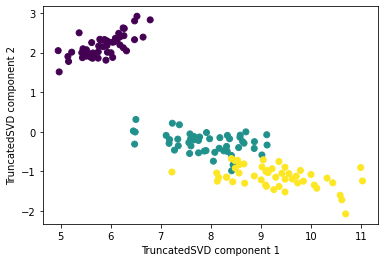

In [ ]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD component 1')
plt.ylabel('TruncatedSVD component 2')

Text(0.5, 1.0, 'PCA Transformed')

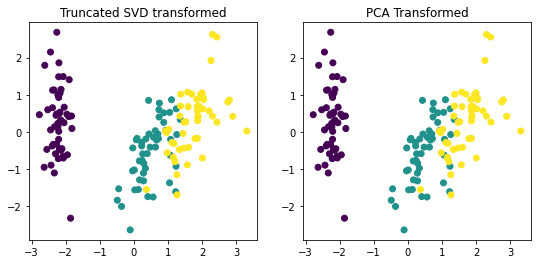

In [ ]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig,(ax1,ax2)=plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target)
ax1.set_title('Truncated SVD transformed')
ax2.set_title('PCA Transformed')

In [ ]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.3224709192840956e-15
2.7755575615628914e-17


## NMF(Non-Negative Matrix Facorization)
Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형. 

원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법 지칭

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

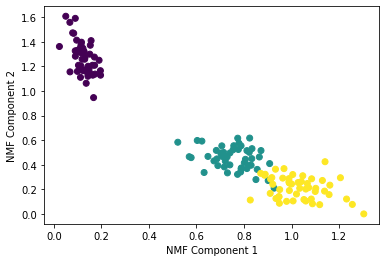

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0],y=iris_nmf[:,1],c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

PCA
*  입력 데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식
* 입력 데이터의 공분산 행렬을 기반으로 고유 벡터를 생성하고 고유 벡터에 입력 데이터를 선형 변환하는 방식

LDA
* 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원 축소

SVD, NMF: 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법